In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import inflection
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
df = pd.read_csv('train-Copy1.csv', sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#membagi data numerics dan categorics
nums = ['balance', 'day', 'age', 'duration', 'campaign', 'pdays', 'previous']
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
        'month', 'poutcome', 'y']

# 1. Data Cleansing

# 1.A. Handle Missing Value

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

***Tidak ada missing values pada dataset, sehingga tidak perlu dihandle.***

# 1.B. Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

***Tidak ada data yg duplikat pada dataset, sehingga tidak perlu dihandle.***

# 1.C. Handle Outlier

***Kondisi Feature Numerik sebelum dilakukan metode z-score.***



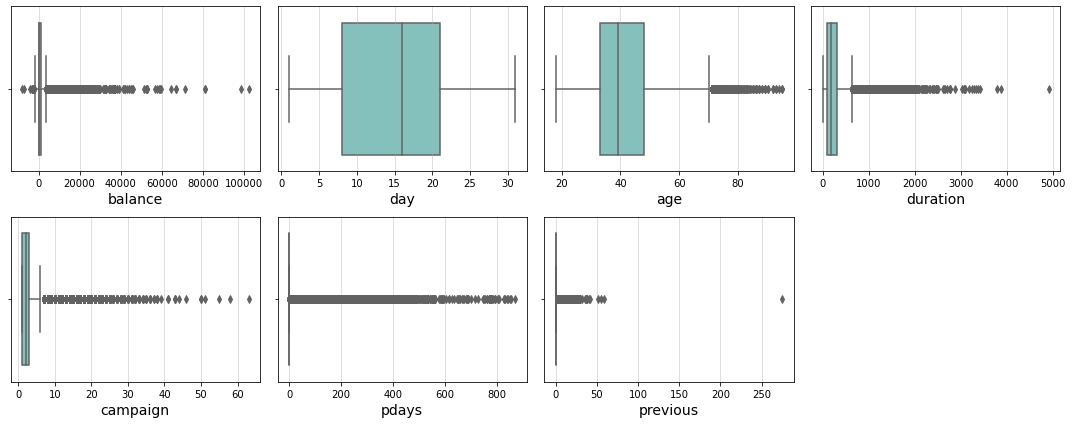

In [ ]:
plt.figure(figsize=(15,6))
for i, col in enumerate(nums):
    plt.subplot(2, 4, i+1)            
    sns.boxplot(
        x=df[col], 
        orient='h',
        palette='GnBu'
    )
    plt.xlabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()
plt.show() 

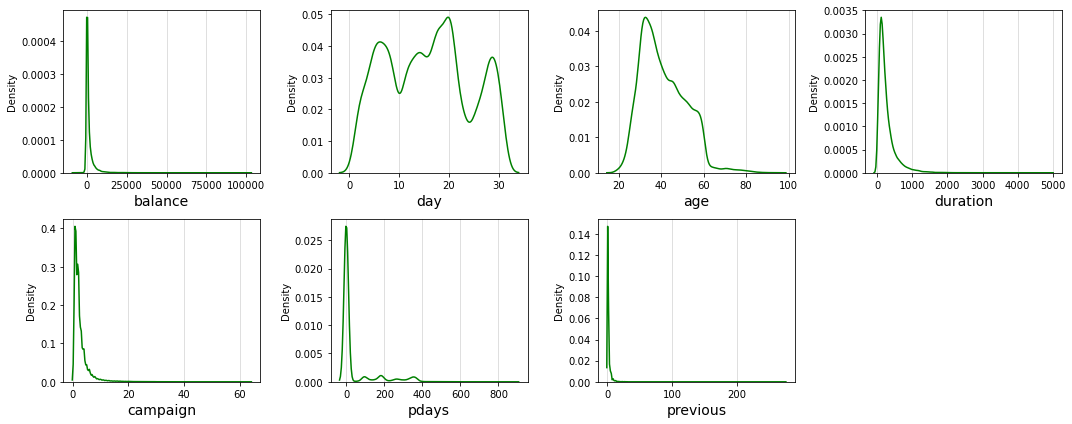

In [ ]:
plt.figure(figsize=(15,6))
for i, col in enumerate(nums):
    plt.subplot(2, 4, i+1)            
    sns.kdeplot(
        x=df[col], 
        color='green'
    )
    plt.xlabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show()

***Kondisi Feature Numerik setelah dilakukan metode z-score.***

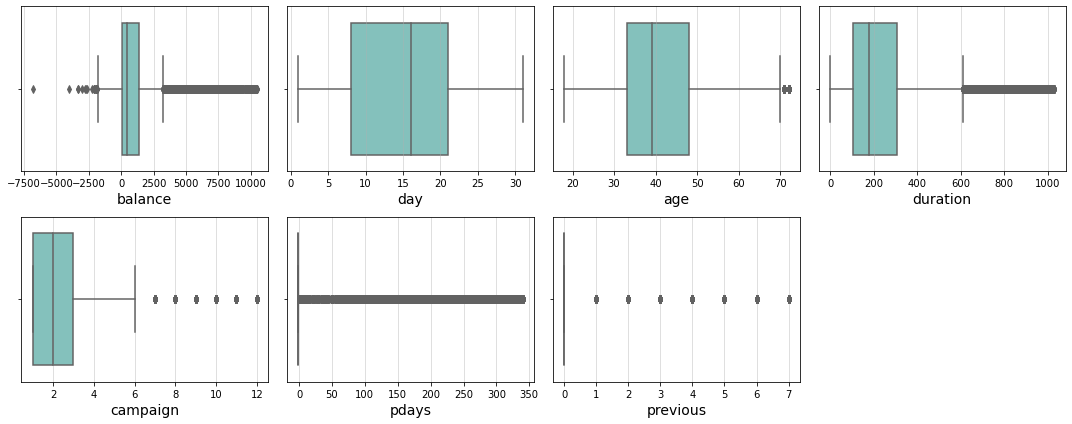

In [ ]:
plt.figure(figsize=(15,6))

filtered_entries = np.array([True] * len(df))
for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_bersih = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3
for i, col in enumerate(nums):
    plt.subplot(2, 4, i+1)            
    sns.boxplot(
        x=df_bersih[col], 
        orient='h',
        palette='GnBu'
    )
    plt.xlabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()
plt.show() 

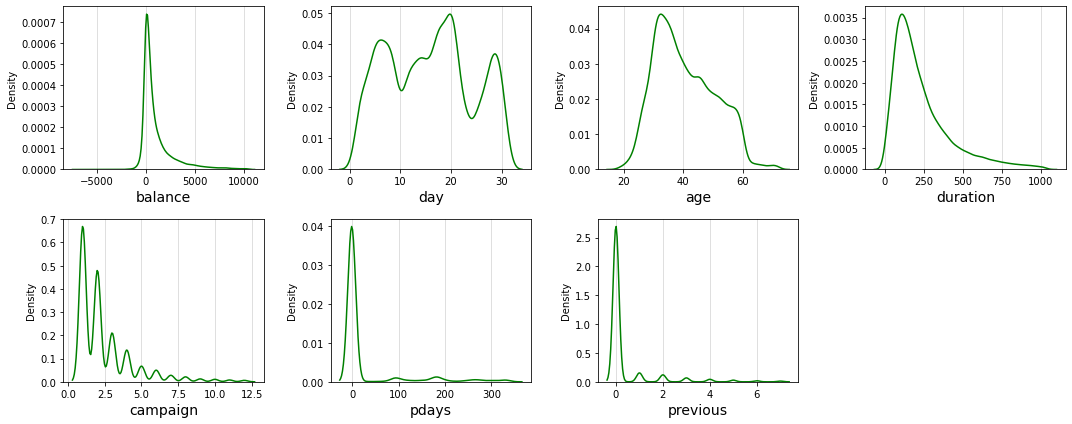

In [ ]:
plt.figure(figsize=(15,6))
for i, col in enumerate(nums):
    plt.subplot(2, 4, i+1)            
    sns.kdeplot(
        x=df_bersih[col], 
        color='green'
    )
    plt.xlabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()
plt.show() 

In [ ]:
print('Jumlah baris sebelum dilakukan handling outliers :', len(df[col]))
print('Jumlah baris setelah dilakukan handling outliers :',len(df_bersih[col]))
print('jumlah baris yang terfilter oleh metode Z-score :' , len(df[col])-len(df_bersih[col]))

Jumlah baris sebelum dilakukan handling outliers : 45211
Jumlah baris setelah dilakukan handling outliers : 40209
jumlah baris yang terfilter oleh metode Z-score : 5002


***Dengan metode Z-Score pada kolom `campaign`, `duration`,dan `age`,mengalami penurunan outlier.***

Kesimpulan pada penanganan outlier:

Dalam menggunakan metode untuk menangani outlier, yaitu metode Z-Score, ternyata metode Z-Score memiliki metode yg sangat baik dalam mengangani penurunan outlier. Terdapat sebanyak 5002 baris yang terfilter oleh metode Z-Score.

# 1.D. Feature Transformation

***Statistik deskriptif feature numerik sebelum normalisasi.***

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


***Antara kolom `balance` dan `pdays` akan diapus salah satunya nanti, karena memiliki multicolinearity dan mempunyai nilai minus.***

**Feature numerik setelah di-rescale dengan MinMaxScaler.**

In [ ]:
def data_scaling(df, nums, scaler):
    df = df.copy()
    
    # apply yeo-johnson transformer
    for var in df[nums]:
        df[var], _ = stats.yeojohnson(df[var])
    
    # apply a scaler to data
    df[nums] = scaler.fit_transform(df[nums])
    
    return df[nums].describe().round(3).T

In [ ]:
data_scaling(df, nums, scaler=MinMaxScaler())

,count,mean,std,min,25%,50%,75%,max
balance,45211.0,0.623,0.018,0.0,0.616,0.619,0.626,1.0
day,45211.0,0.556,0.267,0.0,0.315,0.584,0.732,1.0
age,45211.0,0.505,0.154,0.0,0.395,0.498,0.622,1.0
duration,45211.0,0.477,0.115,0.0,0.406,0.474,0.549,1.0
campaign,45211.0,0.325,0.293,0.0,0.000,0.364,0.541,1.0
pdays,45211.0,0.180,0.381,0.0,0.000,0.000,0.000,1.0
previous,45211.0,0.178,0.378,0.0,0.000,0.000,0.000,1.0


***Kesimpulan diatas : feature minmaxscaler membuat nilai min dan max berubah menjadi 0 dan 1***

**Feature numerik setelah di-rescale dengan StandardScaler dan RobustScaler.**

In [ ]:
data_scaling(df, nums, scaler=StandardScaler())

,count,mean,std,min,25%,50%,75%,max
balance,45211.0,0.0,1.0,-34.880,-0.384,-0.205,0.170,21.137
day,45211.0,0.0,1.0,-2.086,-0.905,0.106,0.660,1.665
age,45211.0,0.0,1.0,-3.280,-0.710,-0.042,0.764,3.219
duration,45211.0,0.0,1.0,-4.162,-0.622,-0.033,0.621,4.556
campaign,45211.0,-0.0,1.0,-1.108,-1.108,0.135,0.738,2.304
pdays,45211.0,0.0,1.0,-0.473,-0.473,-0.473,-0.473,2.154
previous,45211.0,0.0,1.0,-0.472,-0.472,-0.472,-0.472,2.176


***Kesimpulan diatas: StandarScaler mengubah nilai mean menjadi 0 dan std menjadi 1.***

In [ ]:
data_scaling(df, nums, scaler=RobustScaler())

,count,mean,std,min,25%,50%,75%,max
balance,45211.0,0.370,1.803,-62.519,-0.323,0.0,0.677,38.481
day,45211.0,-0.068,0.639,-1.400,-0.646,0.0,0.354,0.996
age,45211.0,0.028,0.679,-2.198,-0.453,0.0,0.547,2.213
duration,45211.0,0.026,0.804,-3.322,-0.474,0.0,0.526,3.691
campaign,45211.0,-0.073,0.542,-0.673,-0.673,0.0,0.327,1.175
pdays,45211.0,0.644,1.363,0.000,0.000,0.0,0.000,3.581
previous,45211.0,0.044,0.092,-0.000,-0.000,0.0,-0.000,0.244


***Kesimpulan diatas : RobustScaler membuat nilai median menjadi 0 dan range data menjadi diantara Q1 dan Q3. Robust Scaler cocok untuk data dengan nilai outliers yang banyak. Data menjadi lebih robust.***

# 1.E. Feature Encoding

In [ ]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Feature Encodding:

* OHE : untuk fitur/kolom yg memiliki unique value < 5, seperti kolom selain `job` dan `month`.

* Freq Encoding : untuk fitur/kolom yg memiliki unique value >= 5, seperti kolom `job`.

* Tetapi pada fitur/kolom `month`, menggunakan fitur encoding berdasarkan quarter (q1-q4).

***One Hot Encoding***

In [ ]:
for i in ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']:
    onehot = pd.get_dummies(df[i], prefix=i)
    df = df.join(onehot)

***Label Encoding***

In [ ]:
y_map = {'no' : 0, 'yes' : 1}

df['y_int'] = df['y'].map(y_map)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  y   

***Menambahkan kolom segmentasi bulan.***

In [ ]:
def monthSegmented(x):
    prefix = x['month'][:3]
    if prefix == 'jan' or prefix == 'feb' or prefix == 'mar':
        monthSegmented = 'q1'
    elif prefix == 'apr' or prefix == 'may' or prefix == 'jun':
        monthSegmented = 'q2'
    elif prefix == 'jul' or prefix == 'aug' or prefix == 'sep':
        monthSegmented = 'q3'
    elif prefix == 'oct' or prefix == 'nov' or prefix == 'dec':
        monthSegmented = 'q4'
    else :
        monthSegmented = 'Others'
    return monthSegmented

In [ ]:
df['month_segment'] = df.apply(lambda x:monthSegmented(x), axis=1 )

In [ ]:
df[['month', 'month_segment']].sample(10)

,month,month_segment
31835,apr,q2
8240,jun,q2
1252,may,q2
14306,jul,q3
9931,jun,q2
17360,jul,q3
33706,apr,q2
26141,nov,q4
34551,may,q2
44097,jul,q3


In [ ]:
df['month_segment'].value_counts()

q2    22039
q3    13721
q4     4922
q1     4529
Name: month_segment, dtype: int64

***Menambahkan kolom freq pekerjaan.***

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
# Calculate the frequency
df_freq_update = df["job"].value_counts().reset_index()

# Create Encoding by Percentage and Rank
df_freq_update["job_freq_percentage"] = (100.0*df_freq_update["job"]) / df_freq_update["job"].sum()
df_freq_update["job_freq_rank"] = df_freq_update["job"].rank()

# Rename the column
df_freq_update = df_freq_update.rename(columns = {"index": "job","job": "job_frequency"})
df_freq_update

,job,job_frequency,job_freq_percentage,job_freq_rank
0,blue-collar,9732,21.525735,12.0
1,management,9458,20.919688,11.0
2,technician,7597,16.803433,10.0
3,admin.,5171,11.437482,9.0
4,services,4154,9.188029,8.0
5,retired,2264,5.007631,7.0
6,self-employed,1579,3.492513,6.0
7,entrepreneur,1487,3.289023,5.0
8,unemployed,1303,2.882042,4.0
9,housemaid,1240,2.742695,3.0


In [ ]:
# Merge the Frequency percentage / rank with the default dataframe
df = df.merge(df_freq_update, on='job')
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_int,month_segment,job_frequency,job_freq_percentage,job_freq_rank
38428,37,services,single,secondary,no,50,no,no,cellular,19,...,0,0,1,0,0,0,q4,4154,9.188029,8.0
20689,34,blue-collar,married,secondary,no,763,yes,no,unknown,27,...,1,0,0,0,1,0,q2,9732,21.525735,12.0
12189,43,technician,married,secondary,no,533,yes,no,cellular,31,...,0,0,0,0,1,0,q3,7597,16.803433,10.0
14385,42,technician,married,secondary,no,3228,no,no,cellular,21,...,0,0,0,0,1,0,q4,7597,16.803433,10.0
2550,31,management,single,tertiary,no,78,yes,no,cellular,22,...,0,0,0,0,1,0,q3,9458,20.919688,11.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   job                  45211 non-null  object 
 2   marital              45211 non-null  object 
 3   education            45211 non-null  object 
 4   default              45211 non-null  object 
 5   balance              45211 non-null  int64  
 6   housing              45211 non-null  object 
 7   loan                 45211 non-null  object 
 8   contact              45211 non-null  object 
 9   day                  45211 non-null  int64  
 10  month                45211 non-null  object 
 11  duration             45211 non-null  int64  
 12  campaign             45211 non-null  int64  
 13  pdays                45211 non-null  int64  
 14  previous             45211 non-null  int64  
 15  poutcome             45211 non-null 

# 1.F. Imbalance Class

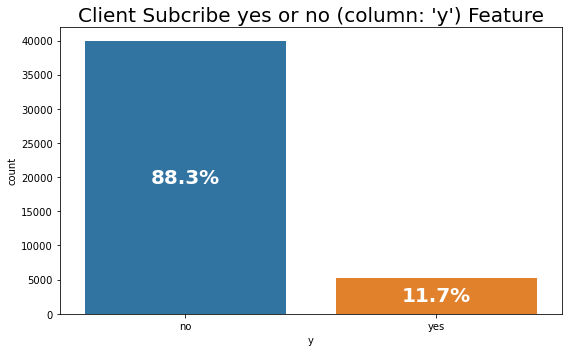

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='y')
for i in ax.patches:
  ax.text(x=i.get_x()+i.get_width()/2,
          y=i.get_height()/2,
          s=f"{np.round(i.get_height()/len(df)*100,2)}%",
          ha="center",
          va="center",
          size=20,
          weight="bold",
          rotation="360",
          color="white")
plt.title("Client Subcribe yes or no (column: 'y') Feature", size=20)
plt.tight_layout()
plt.show()

Karena terdapat class imbalance dengan ratio 89:11 (majority class: minority class) pada kolom target maka ada beberapa cara yang harus digunakan sebagai berikut
* Melakukan resampling (oversampling, undersampling, or over-undersampling) agar target class ratio menjadi balance.
* Menggunakan metrik evaluasi model yang tepat seperti ROC-AUC atau f1-score.

In [ ]:
from imblearn import under_sampling, over_sampling

In [ ]:
# pembuatan binary label target yang imbalance (sebagai contoh)
df['y_class'] = df['y_int'] > 0.8
df['y_class'].value_counts()

False    39922
True      5289
Name: y_class, dtype: int64

In [ ]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['y_int', 'y_class']]]
y = df['y_class'].values
print(X.shape)
print(y.shape)

(45211, 30)
(45211,)


In [ ]:
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X,y)
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X,y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X,y)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    39922
True      5289
dtype: int64


OVERSAMPLING
False    39922
True     39922
dtype: int64


UNDERSAMPLING
False    5289
True     5289
dtype: int64


SMOTE
False    39922
True     39922
dtype: int64


# 2. Feature Engineering

# 2.A. Feature Selection

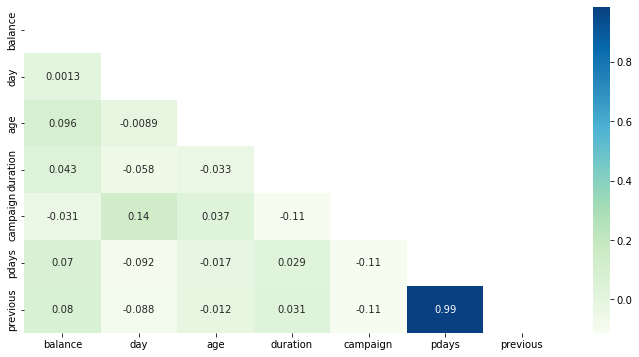

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,6))
data = df[nums].corr(method='spearman')
sns.heatmap(
    data, 
    mask=np.triu(np.ones_like(data)),
    cmap='GnBu', annot=True
)
plt.show()
plt.tight_layout()

***Pada kesimpulan diatas karena terdapat mulcolinearity antara pdays dan previous, maka kolom `pdays` akan di drop. Pdays di drop disebabkan karena korelasi antara pdays dengan kolom lain lebih kecil dibandingkan korelasi antara previous dengan kolom lain.***

# 2.B Feature Extraction

Terdapat 2 fitur baru yg dibuat, yaitu:

* `month_segment` yg merubah kolom `month`, karena nilai unique   valuenya sangat besar, yaitu 12 maka diperkecil menjadi 4, yaitu dengan melakukan segmentasi berdasarkan, quartil (q1-q4).

* `job_freq` yg merubah kolom `job`, karena nilai unique valuenya sama dengan kolom `month`, yaitu 12 maka dilakukan feature engineering dengan mengganti kolom `job` berdasarkan freq nilai banyaknya muncul job tersebut. 

# 2.C Feature Engineering

* Gender
* Jenis Deposito yg diberikan pada nasabah
* Cashback /Promo setiap melakukan pembukaan deposito
* Nominal minimal pembukaan deposito